In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def fileread():
    f = open('JejuPopulation2013-2022.csv', 'r', encoding='cp949')

    data = csv.reader(f)

    header = next(data)

    human = next(data)

    f.close()

    return human

In [8]:
def dataprocess(human):
    xy = {}

    for i in range(10):
        menstr = human[4*i+3]
        womenstr = human[4*i+4]

        men = int(menstr.split(',')[0])*1000+int(menstr.split(',')[1])
        women = int(womenstr.split(',')[0])*1000+int(womenstr.split(',')[1])

        xy[2013+i]=(men, women)

    return xy

In [9]:
def drawgraph(xy):
    fig, ax1 = plt.subplots()
    ratio = []

    for i in xy:
        ax1.bar(i-0.175, xy[i][0], color='cornflowerblue', label='men', width=0.35)
        ax1.bar(i+0.175, xy[i][1], color='tomato', label='women', width=0.35)
        ratio.append(float(xy[i][1])/float(xy[i][0]))

    ax2 = ax1.twinx()
    ax2.plot(list(xy.keys()), ratio, 'o-', color='black', label='ratio')

    plt.xticks(np.arange(2013, 2023))
    ax2.set_yticks(np.arange(0.986, 1.001, 0.002))
    ax1.set_yticks(np.arange(0, 400001, 50000))
    ax1.legend(['men', 'women'], loc='upper left')
    ax2.legend()
    plt.title('Number and ratio of male and female population in Jeju')
    plt.show()

In [13]:
def main():
    human = fileread()
    xy = dataprocess(human)
    drawgraph(xy)

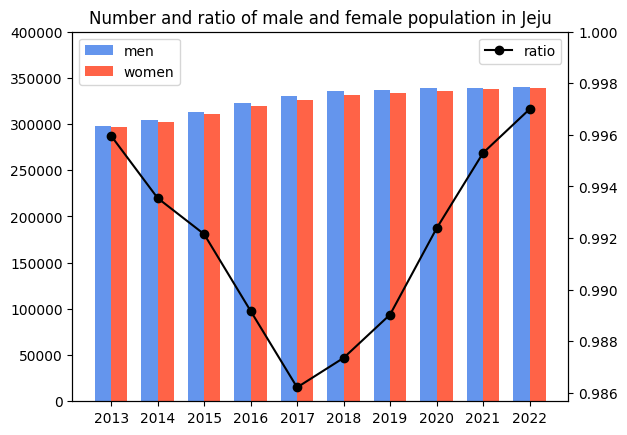

In [14]:
if __name__=='__main__':
    main()